Lambda School Data Science

*Unit 2, Sprint 2, Module 3*

# Improving my model

### And working locally for the first time!

---

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [128]:
DATA_PATH = 'data/'
train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [129]:
def wrangle(X):
  X = X.copy()
  
  X['latitude'] = X['latitude'].replace(-2e-08, 0)
  
  cols_with_zeros = ['longitude', 'latitude', 'construction_year', 'gps_height', 'population']
  
  for col in cols_with_zeros:
    X[col] = X[col].replace(0, np.nan)
    X[col + '_MISSING'] = X[col].isnull()
    
  duplicates = ['quantity_group', 'payment_type']
  X = X.drop(columns=duplicates)

  unusable_variance = ['recorded_by', 'id']
  X = X.drop(columns=unusable_variance)

  X['date_recorded'] = pd.to_datetime(X['date_recorded'], infer_datetime_format=True)

  X['year_recorded'] = X['date_recorded'].dt.year
  X['month_recorded'] = X['date_recorded'].dt.month
  X['day_recorded'] = X['date_recorded'].dt.day
  X = X.drop(columns='date_recorded')

## How many years from construction to the date recorded
  X['years'] = X['year_recorded'] - X['construction_year']
  X['years_MISSING'] = X['years'].isnull()

  least_important_features = ['gps_height_MISSING', 'construction_year_MISSING',
                              'longitude_MISSING', 'latitude_MISSING', 
                              'years_MISSING', 'population_MISSING', 'num_private']
  X = X.drop(columns=least_important_features)

  #### Creating a time of the year feature
  time_features_to_drop = ['day_recorded', 'month_recorded', 'year_recorded']
  X['day_of_year_recorded'] = X['day_recorded']+(X['month_recorded']*30)-30
  X = X.drop(columns=time_features_to_drop)

  ### Getting rid of the 'group' columns (this may or may not have a good effect)
#### ditch scheme management- same as management but with more missing values
  #useless_groups = ['waterpoint_type_group', 'quality_group', 'extraction_type_group', 
                    #'management_group', 'source_class', 'extraction_type_class',
                    #'scheme_management','source_type']
  #X = X.drop(columns=useless_groups)

###I'm going to keep the region_code and ditch the region, because the region_code has more variance
  region = ['region']
  X = X.drop(columns=region)

##same with name: shouldn't make much difference what it's called. Name data should already be captured by lat/long
  waypoint_name = ['wpt_name']
  X = X.drop(columns=waypoint_name)

##### What if I just ditched all the coarse location data and relied on the specific data?
  #coarse_location = ['basin', 'region_code', 'district_code', 'lga',	'ward']
  #X = X.drop(columns=coarse_location)

#### ditch scheme management- same as management but with more missing values
  ditches = ['source_type', 'scheme_management', 'management_group', 'source_class', 'quality_group']
  X = X.drop(columns=ditches)

##These don't seem very important either
  #legal = ['permit', 'public_meeting']
  #X = X.drop(columns=legal)

  return X

train = wrangle(train)
test = wrangle(test)

In [130]:
print(train.shape)

(59400, 30)


In [131]:
train.head
test.head(40)

,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,subvillage,region_code,district_code,...,extraction_type_class,management,payment,water_quality,quantity,source,waterpoint_type,waterpoint_type_group,years,day_of_year_recorded
0,0.0,Dmdd,1996.0,DMDD,35.290799,-4.059696,Internal,Magoma,21,3,...,other,parastatal,never pay,soft,seasonal,rainwater harvesting,other,other,1.0,34
1,0.0,Government Of Tanzania,1569.0,DWE,36.656709,-3.309214,Pangani,Kimnyak,2,2,...,gravity,vwc,never pay,soft,insufficient,spring,communal standpipe,communal standpipe,13.0,34
2,0.0,NaN,1567.0,NaN,34.767863,-5.004344,Internal,Msatu,13,2,...,other,vwc,never pay,soft,insufficient,rainwater harvesting,other,other,3.0,31
3,0.0,Finn Water,267.0,FINN WATER,38.058046,-9.418672,Ruvuma / Southern Coast,Kipindimbi,80,43,...,other,vwc,unknown,soft,dry,shallow well,other,other,26.0,22
4,500.0,Bruder,1260.0,BRUDER,35.006123,-10.950412,Ruvuma / Southern Coast,Losonga,10,3,...,gravity,water board,pay monthly,soft,enough,spring,communal standpipe,communal standpipe,13.0,87
5,0.0,Government Of Tanzania,1685.0,DWE,36.685279,-3.302420,Pangani,Masaga,2,2,...,gravity,vwc,never pay,soft,enough,spring,communal standpipe,communal standpipe,23.0,64
6,0.0,Government Of Tanzania,550.0,Gover,36.398041,-7.541382,Rufiji,Kichangani,11,7,...,handpump,vwc,never pay,salty,enough,machine dbh,hand pump,hand pump,4.0,62
7,0.0,Finw,234.0,FinW,39.607420,-10.893786,Ruvuma / Southern Coast,Ilala,9,4,...,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,communal standpipe,31.0,25
8,30.0,Unicef,584.0,LGA,39.262951,-10.823588,Ruvuma / Southern Coast,Bondeni,90,33,...,gravity,vwc,pay per bucket,soft,insufficient,spring,communal standpipe,communal standpipe,16.0,23
9,0.0,Lawatefuka Water Supply,1083.0,Lawatefuka water sup,37.096108,-3.251754,Pangani,Donyomuruak,3,7,...,gravity,water board,pay monthly,soft,enough,spring,communal standpipe,communal standpipe,10.0,78


In [142]:
print(train['population'].isnull().sum())
train['population'].shape

21381


(59400,)

In [132]:
target = 'status_group'

X_train = train.drop(columns=target)
y_train = train[target]

X_test = test

In [133]:
%%time
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from scipy.stats import randint, uniform


pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    RandomForestClassifier(random_state=42)
    #RandomForestClassifier(n_estimators=300, max_features=.19917, min_samples_leaf=2, n_jobs=-1, random_state=42)
)


param_distributions = {
    #'simpleimputer__strategy': ['mean', 'median'], 
    #'randomforestregressor__n_estimators': randint(50, 500)
    #randomforestclassifier__max_depth': [15, 20, None],
    'randomforestclassifier__min_samples_leaf': [2, 3, 4, 5],
    'randomforestclassifier__n_estimators': [200, 300, 400],
    'randomforestclassifier__max_features': uniform(0, 1) 

}



search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=10, 
    cv=10, 
    #scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train, y_train)

print('Best hyperparameters', search.best_params_)
print('Cross-validation', -search.best_score_)


#scores = cross_val_score(pipeline, X_train, y_train, cv=10)
#print('score for all my folds:', scores)
#scores.mean()

#pipeline.fit(X_train, y_train)
#print('Train Accuracy', pipeline.score(X_train, y_train))


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done  96 out of 100 | elapsed: 30.9min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 31.3min finished


Best hyperparameters {'randomforestclassifier__max_features': 0.19917373880069955, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__n_estimators': 300}
Cross-validation -0.8182323232323233
CPU times: user 42.3 s, sys: 1.09 s, total: 43.4 s
Wall time: 31min 49s


In [134]:
print('Model Hyperparameters:')
print(pipeline.named_steps['randomforestclassifier'])

Model Hyperparameters:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


In [135]:
pipeline = search.best_estimator_

In [136]:
#pipeline.fit(X_train, y_train)
encoder = pipeline.named_steps['ordinalencoder']
encoded = encoder.transform(X_train)

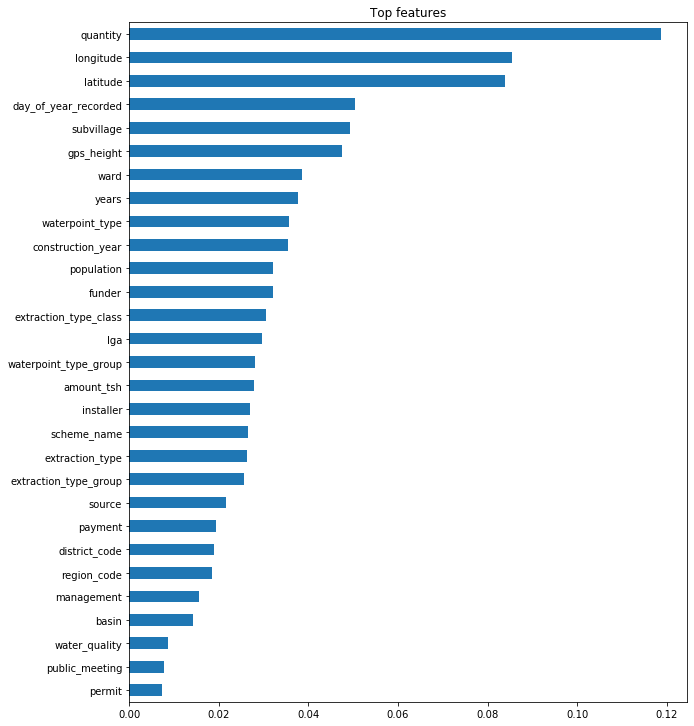

In [137]:
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, encoded.columns)
n = 50
plt.figure(figsize=(10,n/4))
plt.title(f'Top features')
importances.sort_values()[-n:].plot.barh();

In [138]:
y_pred = pipeline.predict(X_test)
y_pred.shape

(14358,)

In [139]:

sample_submission = pd.read_csv('sample_submission.csv')
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('willsn_submission.csv', index=False)
